
### Geometric-Mean Consensus Explained

The concept of **geometric-mean consensus** in multi-agent systems is a fascinating topic. It involves agents in a network reaching an agreement on a certain quantity by iteratively updating their states based on the geometric mean of their neighbors' states.

In a **geometric-mean consensus**, each agent updates its state to the geometric mean of its own state and the states of its neighbors. Mathematically, if we denote the state of agent $i$ at time $t$ as $x_i(t)$, the update rule can be expressed as:

$$
x_i(t+1) = \left( \prod_{j \in \mathcal{N}_i} x_j(t) \right)^{\frac{1}{|\mathcal{N}_i|}}
$$

where $\mathcal{N}_i$ is the set of neighbors of agent $i$, and $|\mathcal{N}_i|$ is the number of neighbors.

### Visual Example

Let's consider a simple network of four agents arranged in a line:

```
A -- B -- C -- D
```

- **Initial States**: Suppose the initial states of the agents are:
  - $x_A(0) = 4$
  - $x_B(0) = 2$
  - $x_C(0) = 8$
  - $x_D(0) = 16$

- **First Update**:
  - Agent A: $x_A(1) = \sqrt{x_A(0) \cdot x_B(0)} = \sqrt{4 \cdot 2} = \sqrt{8} \approx 2.83$
  - Agent B: $x_B(1) = \sqrt{x_A(0) \cdot x_C(0)} = \sqrt{4 \cdot 8} = \sqrt{32} \approx 5.66$
  - Agent C: $x_C(1) = \sqrt{x_B(0) \cdot x_D(0)} = \sqrt{2 \cdot 16} = \sqrt{32} \approx 5.66$
  - Agent D: $x_D(1) = \sqrt{x_C(0) \cdot x_D(0)} = \sqrt{8 \cdot 16} = \sqrt{128} \approx 11.31$

- **Second Update**:
  - Agent A: $x_A(2) = \sqrt{x_A(1) \cdot x_B(1)} = \sqrt{2.83 \cdot 5.66} \approx 4$
  - Agent B: $x_B(2) = \sqrt{x_A(1) \cdot x_C(1)} = \sqrt{2.83 \cdot 5.66} \approx 4$
  - Agent C: $x_C(2) = \sqrt{x_B(1) \cdot x_D(1)} = \sqrt{5.66 \cdot 11.31} \approx 8$
  - Agent D: $x_D(2) = \sqrt{x_C(1) \cdot x_D(1)} = \sqrt{5.66 \cdot 11.31} \approx 8$

After several iterations, the states of all agents will converge to the same value, achieving consensus.

### Applications

Geometric-mean consensus is particularly useful in scenarios where the states represent quantities that should be combined multiplicatively, such as in certain economic models or in distributed estimation problems where the product of measurements is more meaningful than their sum.


Agent Number  1  with State : 2.8284271247461903
Agent Number  2  with State : 8.0
Agent Number  3  with State : 16.0
Agent Number  4  with State : 11.313708498984761
Agent Number  1  with State : 4.756828460010884
Agent Number  2  with State : 19.027313840043536
Agent Number  3  with State : 38.05462768008707
Agent Number  4  with State : 13.454342644059434
Agent Number  1  with State : 9.513656920021768
Agent Number  2  with State : 58.68825876509895
Agent Number  3  with State : 98.70149282610821
Agent Number  4  with State : 22.627416997969522


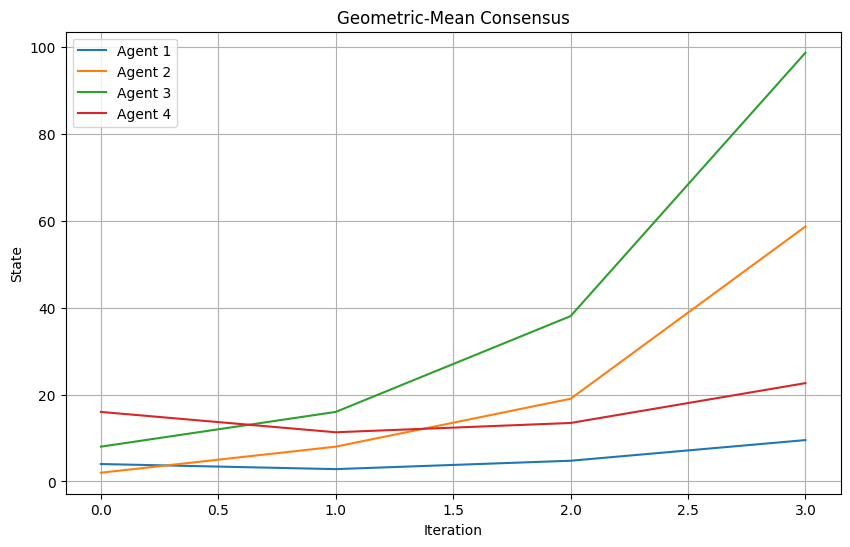

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Initial states of the agents
states = np.array([4, 2, 8, 16], dtype=float)

# Adjacency matrix representing the network
# A -- B -- C -- D
adj_matrix = np.array([
    [0, 1, 0, 0],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [0, 0, 1, 0]
])

def geometric_mean_consensus(states, adj_matrix, iterations=10):
    num_agents = len(states)
    history = [states.copy()]
    for _ in range(iterations):
        new_states = np.zeros(num_agents)
        for i in range(num_agents):
            neighbors = np.where(adj_matrix[i] == 1)[0]
            product = np.prod(states[neighbors])
            # product = np.sum(states[neighbors])/2
            new_states[i] = np.sqrt(states[i] * product)
            # new_states[i] = np.sum(states[i] + product)/2
            print('Agent Number ',1 + i,' with State :',new_states[i])
        states = new_states
        history.append(states.copy())
    return np.array(history)

# Run the consensus algorithm
iterations = 3
history = geometric_mean_consensus(states, adj_matrix, iterations)

# Plotting the results
plt.figure(figsize=(10, 6))
for i in range(history.shape[1]):
    plt.plot(history[:, i], label=f'Agent {i+1}')
plt.xlabel('Iteration')
plt.ylabel('State')
plt.title('Geometric-Mean Consensus')
plt.legend()
plt.grid(True)
plt.show()


### Modified Geomeric-Mean Consensus

Agent Number  1  with State : 2.5
Agent Number  2  with State : 4.0
Agent Number  3  with State : 8.5
Agent Number  4  with State : 10.0
Agent Number  1  with State : 2.25
Agent Number  2  with State : 4.75
Agent Number  3  with State : 7.75
Agent Number  4  with State : 7.125
Agent Number  1  with State : 2.3125
Agent Number  2  with State : 4.875
Agent Number  3  with State : 6.84375
Agent Number  4  with State : 5.5
Agent Number  1  with State : 2.375
Agent Number  2  with State : 4.7265625
Agent Number  3  with State : 6.015625
Agent Number  4  with State : 4.4609375
Agent Number  1  with State : 2.369140625
Agent Number  2  with State : 4.4609375
Agent Number  3  with State : 5.3046875
Agent Number  4  with State : 3.734375
Agent Number  1  with State : 2.2998046875
Agent Number  2  with State : 4.14892578125
Agent Number  3  with State : 4.701171875
Agent Number  4  with State : 3.193359375
Agent Number  1  with State : 2.1871337890625
Agent Number  2  with State : 3.82470703125


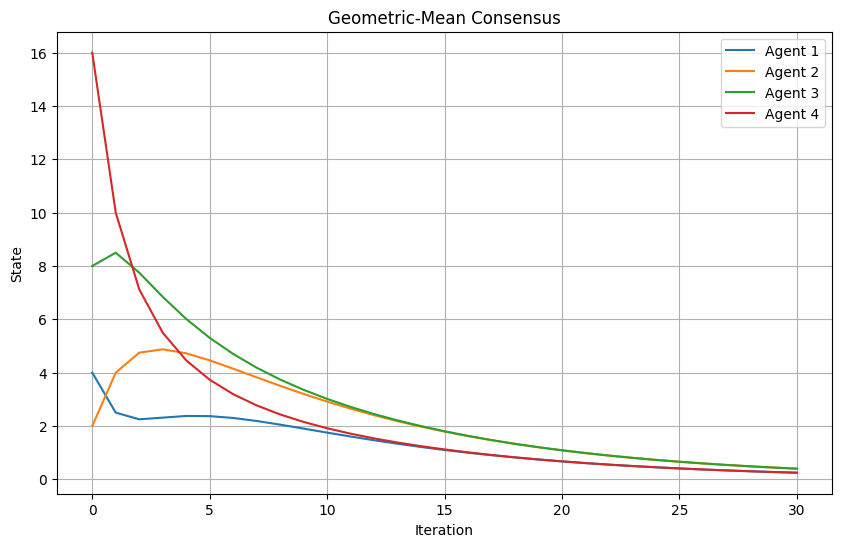

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Initial states of the agents
states = np.array([4, 2, 8, 16], dtype=float)

# Adjacency matrix representing the network
# A -- B -- C -- D
adj_matrix = np.array([
    [0, 1, 0, 0],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [0, 0, 1, 0]
])

def geometric_mean_consensus(states, adj_matrix, iterations=10):
    num_agents = len(states)
    history = [states.copy()]
    for _ in range(iterations):
        new_states = np.zeros(num_agents)
        for i in range(num_agents):
            neighbors = np.where(adj_matrix[i] == 1)[0]
            # product = np.prod(states[neighbors])
            product = np.sum(states[neighbors])/2
            # new_states[i] = np.sqrt(states[i] * product)
            new_states[i] = np.sum(states[i] + product)/2
            print('Agent Number ',1 + i,' with State :',new_states[i])
        states = new_states
        history.append(states.copy())
    return np.array(history)

# Run the consensus algorithm
iterations = 30
history = geometric_mean_consensus(states, adj_matrix, iterations)

# Plotting the results
plt.figure(figsize=(10, 6))
for i in range(history.shape[1]):
    plt.plot(history[:, i], label=f'Agent {i+1}')
plt.xlabel('Iteration')
plt.ylabel('State')
plt.title('Geometric-Mean Consensus')
plt.legend()
plt.grid(True)
plt.show()